In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#train_test_split
from sklearn.model_selection import train_test_split
#multinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import string
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel(r"Data_Train.xlsx")
#installation of openpyxl library might be needed(pip install openpyxl)

## Part 1: Exploring dataset, cleaning and initial visualizations 

In [3]:
pd.set_option('display.max_colwidth',130)
df.head()

,STORY,SECTION
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3


In [4]:
df.shape

(7628, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [6]:
df.rename(columns={'STORY':'story','SECTION':'section'},inplace=True)

In [7]:
df['section'].isnull().value_counts()
#which means no missing values in section columns

False    7628
Name: section, dtype: int64

In [8]:
df['story'].isnull().value_counts()
#which means no missing values in story columns

False    7628
Name: story, dtype: int64

In [9]:
df.drop_duplicates().shape

(7551, 2)

In [10]:
df=df.drop_duplicates()
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.head()

,story,section
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3


In [11]:
df.shape

(7551, 2)

In [12]:
df_grouped=df.groupby(by=['section']).count()
df_grouped.index=['Politics','Technology','Entertainment','Business']
df_grouped

,story
Politics,1673
Technology,2731
Entertainment,1914
Business,1233


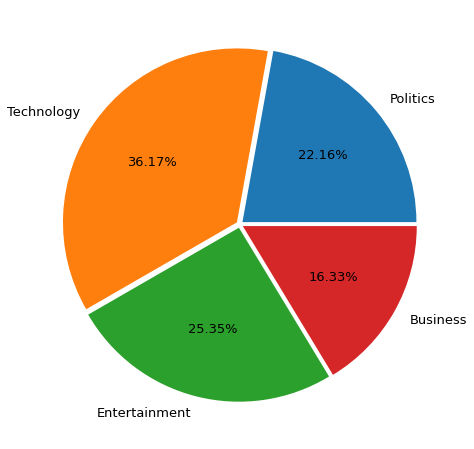

In [13]:
sns.reset_orig()
ax=df_grouped['story'].plot(kind='pie',figsize=(12,8),explode=[0.02,0.02,0.02,0.02],ylabel='',autopct='%1.2f%%',fontsize=13)
#ax.set_title('Percentage of Stories per Section',fontsize=16)
plt.show()

#### Na eksigithei meta tounto plot oti to accuracy metric tha einai okay afou exoume ikanopoiitiko arithmo se kathe class

In [14]:
df['length']=0
i=0
for i in range(df.shape[0]):
    df.iloc[i,2]=len(df.loc[i,'story'])
    i+=1

In [15]:
df.head()

,story,section,length
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3,843
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0,129
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3,386
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1,587
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3,299


In [16]:
i=0
for i in range(len(df['section'])):
    if df.loc[i,'section']==0:
        df.loc[i,'section_words']='Politics'
    elif df.loc[i,'section']==1:
        df.loc[i,'section_words']='Technology'
    elif df.loc[i,'section']==2:
        df.loc[i,'section_words']='Entertainment'
    elif df.loc[i,'section']==3:
        df.loc[i,'section_words']= 'Business'        
    i+=1

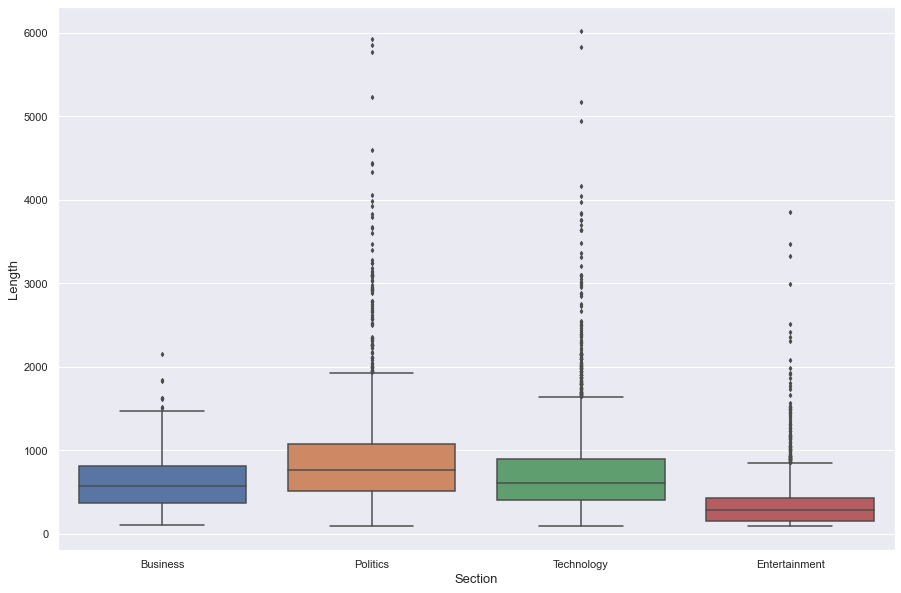

In [17]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
ax=sns.boxplot(y=df['length'],x=df['section_words'],fliersize=3)
ax.set_ylabel('Length',fontsize=13)
ax.set_xlabel('Section',fontsize=13)
#ax.set_title('Stories charachter length by section',fontsize=18)
plt.show()

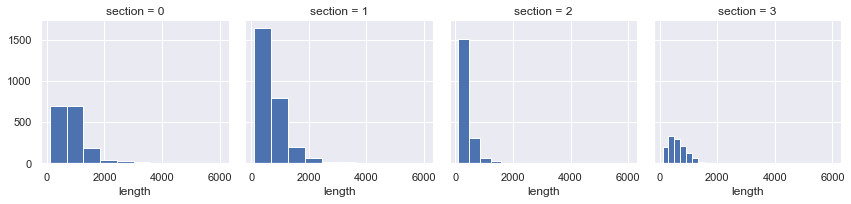

In [18]:
#nomizw touto na min mpei giati dixnei to idio me boxplot kai tha doun oti to pirame afou einai etoimo apo notebooks
g = sns.FacetGrid(df,col='section')
g.map(plt.hist,'length')

## Part 2: Text processing 

### Part 2b: Text Cleaning (punctuations, htmls, stemming etc)

In [19]:
corpus = [['learning','dog','cat']]

In [20]:
model = Word2Vec(corpus, min_count = 1)
model

In [21]:
print(model.wv['cat'])

[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
  4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
 -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
 -1.5080094e-03  2.46979

In [22]:
print(model.wv.similarity('dog', 'learning'))

-0.023671674


In [23]:
print(model.wv.similarity('dog', 'cat'))

-0.010839173


In [24]:
# Remove html tags. Get a string as input and return the string without html tags.
def remove_htmltags(html):
    return BeautifulSoup(html).get_text()

df['story_notags'] = df['story'].map(lambda l: remove_htmltags(l))
df.head()

,story,section,length,section_words,story_notags
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ..."
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?"
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma..."
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users...."
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h..."


In [25]:
punctuation = string.punctuation
stop_words = stopwords.words('english')

#remove punctuations
def remove_punct(text):
    text = "".join([char for char in text if char not in punctuation])
    return text

# remove stopwords (words must be lowercase prior stop words removal)
def remove_stopwords(text):
    tokens = word_tokenize(text.lower()) # tokens is a list of words
    text = " ".join([word for word in tokens if word not in stop_words])
    return text

df['story_nopunct'] = df['story_notags'].map(lambda l: remove_punct(l))
df['story_nostop'] = df['story_nopunct'].map(lambda l: remove_stopwords(l))

df.head()

,story,section,length,section_words,story_notags,story_nopunct,story_nostop
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",But the most painful was the huge reversal in fee income unheard of among private sector lenders Essentially it means that Yes...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank took granted fees structured ...
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhand Vikas Morcha Prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 China Offshore 015 Malaysian ri...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malaysian ringgit 012 indonesian ru...
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check out replies of other users Pr...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer either writing voice command wan...
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",In global markets gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the he...,global markets gold prices edged today disappointing chinese factory activity data brought back concerns health global economy...


In [26]:
#lemmatizing
wl = nltk.WordNetLemmatizer()
def lemmatizing(text):
    tokens = word_tokenize(text)
    lemmatized_text = " ".join([wl.lemmatize(word) for word in tokens])
    return lemmatized_text

In [27]:
#Stemming
ps = nltk.PorterStemmer()
def stemming(text):
    tokens = word_tokenize(text)
    stemmed_text = " ".join([ps.stem(word) for word in tokens])
    return stemmed_text

In [28]:
#In the end we are using either stemming or lemmatizing
df['story_stemmed'] = df['story_nostop'].map(lambda l: stemming(l))
df['story_lemmatized'] = df['story_nostop'].map(lambda l: lemmatizing(l))
df.head()

,story,section,length,section_words,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that ...",But the most painful was the huge reversal in fee income unheard of among private sector lenders Essentially it means that Yes...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank took granted fees structured ...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fee structur loan deal paid acco...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank took granted fee structured loa...
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhand Vikas Morcha Prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Ma...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 China Offshore 015 Malaysian ri...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malaysian ringgit 012 indonesian ru...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian ringgit 012 indonesian rupiah 0...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysian ringgit 012 indonesian rupi...
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users....",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check out replies of other users Pr...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer either writing voice command wan...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either write voic command want ask que...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer either writing voice command want a...
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the h...",In global markets gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the he...,global markets gold prices edged today disappointing chinese factory activity data brought back concerns health global economy...,global market gold price edg today disappoint chines factori activ data brought back concern health global economi dent risk a...,global market gold price edged today disappointing chinese factory activity data brought back 

#### We can see in the dataframe above and below the difference between stemming and lemmatizing

In [29]:
pd.set_option('display.max_colwidth',400)
df[['story_stemmed','story_lemmatized']].tail(5)

,story_stemmed,story_lemmatized
7546,karnataka congress bastion also gave bjp first govern southern state 2007 sinc form govern karnataka congressjanata dal secular coalit struggl stay togeth rival bharatiya janata parti bjp mint analys differ could impact fate coalit state improv prospect bjp,karnataka congress bastion also gave bjp first government southern state 2007 since forming government karnataka congressjanata dal secular coalition struggled stay together rival bharatiya janata party bjp mint analysis difference could impact fate coalition state improve prospect bjp
7547,film also featur janhvi kapoor revolv around sing ghost put groom sleep possess bride,film also feature janhvi kapoor revolve around singing ghost put groom sleep posse bride
7548,databas creat bring togeth crimin record state polic prison depart grp guard railway network state senior offici involv develop app said databas help policeman ground deploy techniqu like face recognit text search biometr record analysi phonet search artifici intellig ai gang analysi “ zero crimin quick target manner,database created bringing together criminal record state police prison department grp guard railway network state senior official involved developing app said database help policeman ground deploying technique like face recognition text search biometric record analysis phonetic search artificial intelligence ai gang analysis “ zero criminal quick targeted manner
7549,state uneasi relationship mainland sinc day late proindepend leader angami zapu phizo wari nation democrat allianc nda promis naga peac accord 2015 held slow progress talk controversi citizenship amend bill 2016 along avers peopl christianmajor state toward bjp ’ agenda promot hindutva uniform civil code major issu nagaland direct contest nagaland money power fuell polit corrupt ‘ hand ’ ‘ glo...,state uneasy relationship mainland since day late proindependence leader angami zapu phizo wary national democratic alliance nda promise naga peace accord 2015 held slow progress talk controversial citizenship amendment bill 2016 along aversion people christianmajority state toward bjp ’ agenda promote hindutva uniform civil code major issue nagaland direct contest nagaland money power fuelled...
7550,viru star kunchacko boban tovino thoma indrajith sukumaran asif ali soubin shahir poornima indrajith sreenath bhasi rima kalling remya nambeesan joju georg dileesh pothan senthil krishna rahman revathi asha kelunni parvathi thiruvothu indran madonna sebastian,virus star kunchacko boban tovino thomas indrajith sukumaran asif ali soubin shahir poornima indrajith sreenath bhasi rima kallingal remya nambeesan joju george dileesh pothan senthil krishna rahman revathy asha kelunni parvathy thiruvothu indrans madonna sebastian


### Part 2b: Creating Bag of Words, TfidfVectorized, Word2Vec etc. Creating the inputs/data for the classifier/algorithm 

### Bank of Words

In [30]:
#Creating a bag-of-words dictionary of words from the data
bank_of_words_dict_stemm = CountVectorizer().fit(df['story_stemmed'])

#Total number of words in the bow_dictionary
len(bank_of_words_dict_stemm.vocabulary_)

29514

In [31]:
type(bank_of_words_dict_stemm.vocabulary_)

dict

In [32]:
#print(bank_of_words_dict_stemm.vocabulary_)
#emfanizei oles tis lekseis (29514) mazi me ton arithmo tous diladi ton arithmo to column p tha vriskete i leksi

### To pio katw eina pinakas me rows: nDocuments, columns: nWords with values to frequency of the word (diladi poses fores emfanizete i kathe leksi sto document)

In [33]:
bank_of_words=bank_of_words_dict_stemm.transform(df['story_stemmed'])
type(bank_of_words)

scipy.sparse.csr.csr_matrix

In [34]:
bank_of_words.shape

(7551, 29514)

In [35]:
df['story_stemmed'][1]

'formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik'

In [36]:
bank_of_words_dict_stemm.vocabulary_['formid']

11835

In [37]:
print(bank_of_words[1])

  (0, 4406)	1
  (0, 4576)	1
  (0, 8316)	1
  (0, 11835)	1
  (0, 15092)	2
  (0, 15140)	1
  (0, 18170)	2
  (0, 18344)	1
  (0, 19668)	1
  (0, 21111)	1
  (0, 28285)	1


In [38]:
i=0
for i in range(bank_of_words.shape[0]):
    df.loc[i,'n_stemm_words']=bank_of_words[i].sum()
    i+=1

In [39]:
#Bank of words with lemmatization
#Creating a bag-of-words dictionary of words from the data
bank_of_words_dict_lemm = CountVectorizer().fit(df['story_lemmatized'])

#Total number of words in the bow_dictionary
len(bank_of_words_dict_lemm.vocabulary_)

35637

In [40]:
bank_of_words_lemm=bank_of_words_dict_lemm.transform(df['story_lemmatized'])
print(bank_of_words_lemm[2])

  (0, 22)	1
  (0, 41)	1
  (0, 43)	1
  (0, 49)	1
  (0, 50)	1
  (0, 70)	1
  (0, 88)	1
  (0, 97)	1
  (0, 3648)	1
  (0, 3651)	1
  (0, 5543)	1
  (0, 8572)	2
  (0, 8919)	1
  (0, 10260)	3
  (0, 11838)	2
  (0, 16534)	1
  (0, 17175)	1
  (0, 17265)	1
  (0, 18145)	1
  (0, 19124)	1
  (0, 20106)	1
  (0, 20453)	1
  (0, 20484)	1
  (0, 20974)	1
  (0, 23310)	1
  (0, 25537)	1
  (0, 27183)	1
  (0, 27671)	1
  (0, 28024)	1
  (0, 30217)	1
  (0, 30945)	1
  (0, 31645)	1
  (0, 32451)	1
  (0, 32648)	2
  (0, 35421)	1


In [41]:
bank_of_words_lemm.shape
#it has 35637 words instead of 29514 with stemming

(7551, 35637)

In [42]:
i=0
for i in range(bank_of_words_lemm.shape[0]):
    df.loc[i,'n_lemm_words']=bank_of_words_lemm[i].sum()
    i+=1

In [43]:
pd.set_option('display.max_colwidth',100)
df.head()

,story,section,length,section_words,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized,n_stemm_words,n_lemm_words
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",But the most painful was the huge reversal in fee income unheard of among private sector lenders...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fe...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank t...,82.0,82.0
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhan...,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,13.0,13.0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 C...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malay...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian r...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysi...,41.0,40.0
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer ei...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either w...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer eithe...,51.0,51.0
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",In global markets gold prices edged up today as disappointing Chinese factory activity data brou...,global markets gold prices edged today disappointing chinese factory activity data brought back ...,global market gold price edg today disappoint chines factori activ data brought back concern hea...,global market gold price edged today disappointing chinese factory activity data brought back co...,37.0,37.0


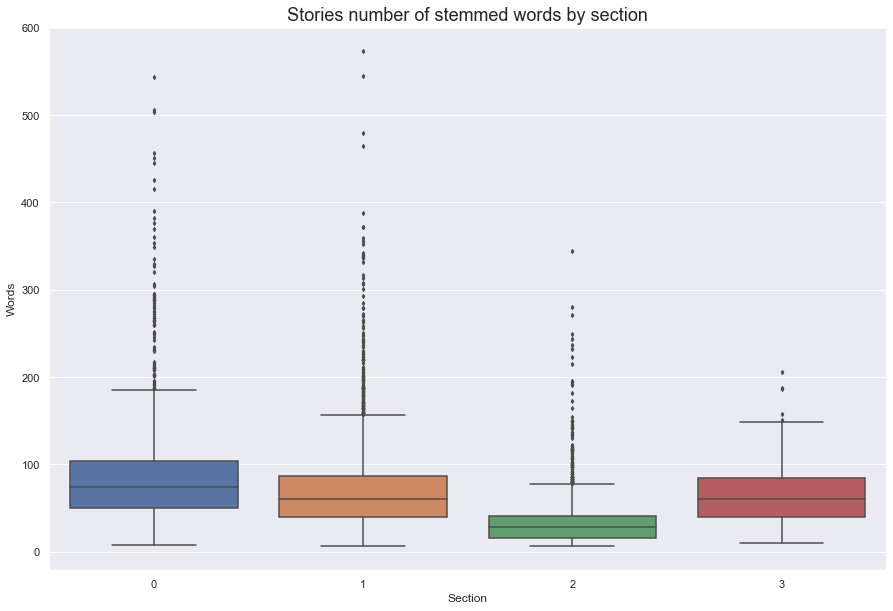

In [44]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
ax=sns.boxplot(y=df['n_stemm_words'],x=df['section'],fliersize=3)
ax.set_ylabel('Words',fontsize=12)
ax.set_xlabel('Section',fontsize=12)
ax.set_title('Stories number of stemmed words by section',fontsize=18)
plt.show()

### Create the TfidfVectorized which is a matrix of rows: nDocuments, columns: nWords with values the weights instead of just bag of words (frequencies) 

In [45]:
#TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = df['story_stemmed']
print(type(corpus))
tfidf_matrix = vectorizer.fit_transform(corpus)
#auto dimiourgei to matrix tis selidas 25. Diladi kathe document se vector me weights instead of just bag of words

<class 'pandas.core.series.Series'>


In [46]:
print(tfidf_matrix)

  (0, 15446)	0.09388610839620316
  (0, 16878)	0.05875564480559559
  (0, 12824)	0.06594441389087274
  (0, 20555)	0.12907356416861848
  (0, 13663)	0.07328789405163658
  (0, 12468)	0.0646283334424227
  (0, 28778)	0.05975601723833473
  (0, 23189)	0.11485107909129413
  (0, 8125)	0.04960332260134219
  (0, 24141)	0.1057738415953813
  (0, 5571)	0.09163021627588931
  (0, 25261)	0.09594406932851163
  (0, 25576)	0.07458096228080982
  (0, 21466)	0.1458920949533288
  (0, 29000)	0.06458758440548328
  (0, 12168)	0.07073358669860175
  (0, 27460)	0.09678744536915457
  (0, 16561)	0.13126911776988107
  (0, 14035)	0.08335807254956704
  (0, 7887)	0.09437695762246671
  (0, 16687)	0.07760865705518609
  (0, 14657)	0.13582842506316967
  (0, 8356)	0.07716544348171817
  (0, 18920)	0.07399367742332541
  (0, 12603)	0.06555135386679539
  :	:
  (7550, 15372)	0.1763745656134305
  (7550, 22804)	0.1763745656134305
  (7550, 6121)	0.1763745656134305
  (7550, 25220)	0.1763745656134305
  (7550, 14309)	0.352749131226861
  (

In [47]:
tfidf_matrix.shape

(7551, 29514)

In [48]:
print(tfidf_matrix[1])
#apo to pio katw opou den exei timi einai 0

  (0, 21111)	0.3050856803947765
  (0, 28285)	0.24262065016643652
  (0, 15140)	0.3050856803947765
  (0, 18170)	0.5606659146653455
  (0, 18344)	0.297117083416119
  (0, 15092)	0.45128594010925277
  (0, 8316)	0.11530379170753435
  (0, 4406)	0.14950485993734705
  (0, 19668)	0.15574203172119344
  (0, 11835)	0.2629951669678283
  (0, 4576)	0.14010046632079876


In [49]:
print(tfidf_matrix[1,1])

0.0


In [50]:
df['story_stemmed'][1]

'formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik'

In [51]:
df['story_lemmatized'][1]

'formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik'

### Cosine similarity and heatmap

In [52]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.00903738 0.         ... 0.         0.00736739 0.        ]
 [0.00903738 1.         0.         ... 0.         0.03119979 0.        ]
 [0.         0.         1.         ... 0.         0.00802793 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.02487987 0.        ]
 [0.00736739 0.03119979 0.00802793 ... 0.02487987 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [53]:
pd10=pd.DataFrame(cosine_sim)
pd10.head()

,0,1,2,3,4,5,6,7,8,9,...,7541,7542,7543,7544,7545,7546,7547,7548,7549,7550
0,1.000000,0.009037,0.000000,0.00000,0.000000,0.004616,0.046516,0.008528,0.018689,0.012555,...,0.001693,0.040720,0.020680,0.000000,0.018383,0.000000,0.023227,0.000000,0.007367,0.0
1,0.009037,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.020830,0.000000,0.000000,...,0.000000,0.019692,0.000000,0.000000,0.000000,0.011162,0.000000,0.000000,0.031200,0.0
2,0.000000,0.000000,1.000000,0.00000,0.075186,0.016002,0.000000,0.033109,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006068,0.000000,0.000000,0.000000,0.000000,0.008028,0.0
3,0.000000,0.000000,0.000000,1.00000,0.007350,0.000000,0.000000,0.000000,0.020031,0.007575,...,0.000000,0.000000,0.011951,0.029939,0.000000,0.002355,0.003404,0.014187,0.007903,0.0
4,0.000000,0.000000,0.075186,0.00735,1.000000,0.037281,0.014120,0.055347,0.018914,0.010191,...,0.000000,0.028634,0.000000,0.000000,0.013360,0.000000,0.000000,0.000000,0.014265,0.0


In [54]:
pd10.shape

(7551, 7551)

In [55]:
pd11=pd10.loc[0:25,0:25]

i=0
while i<pd11.shape[0]:
    pd11.iloc[i,i]=0
    i+=1

In [56]:
df.shape

(7551, 11)

In [57]:
df.head()

,story,section,length,section_words,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized,n_stemm_words,n_lemm_words
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",But the most painful was the huge reversal in fee income unheard of among private sector lenders...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fe...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank t...,82.0,82.0
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhan...,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,13.0,13.0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 C...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malay...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian r...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysi...,41.0,40.0
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer ei...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either w...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer eithe...,51.0,51.0
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",In global markets gold prices edged up today as disappointing Chinese factory activity data brou...,global markets gold prices edged today disappointing chinese factory activity data brought back ...,global market gold price edg today disappoint chines factori activ data brought back concern hea...,global market gold price edged today disappointing chinese factory activity data brought back co...,37.0,37.0


In [58]:
pd11.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.009037,0.000000,0.00000,0.000000,0.004616,0.046516,0.008528,0.018689,0.012555,...,0.009066,0.013395,0.006106,0.026053,0.0,0.000000,0.006202,0.0,0.017911,0.023667
1,0.009037,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.020830,0.000000,0.000000,...,0.019690,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.004415
2,0.000000,0.000000,0.000000,0.00000,0.075186,0.016002,0.000000,0.033109,0.000000,0.000000,...,0.000000,0.015181,0.000000,0.011167,0.0,0.000000,0.000000,0.0,0.000000,0.009506
3,0.000000,0.000000,0.000000,0.00000,0.007350,0.000000,0.000000,0.000000,0.020031,0.007575,...,0.048185,0.000000,0.000000,0.000000,0.0,0.008973,0.026696,0.0,0.000000,0.003186
4,0.000000,0.000000,0.075186,0.00735,0.000000,0.037281,0.014120,0.055347,0.018914,0.010191,...,0.018770,0.041600,0.000000,0.017257,0.0,0.000000,0.024770,0.0,0.000000,0.039765


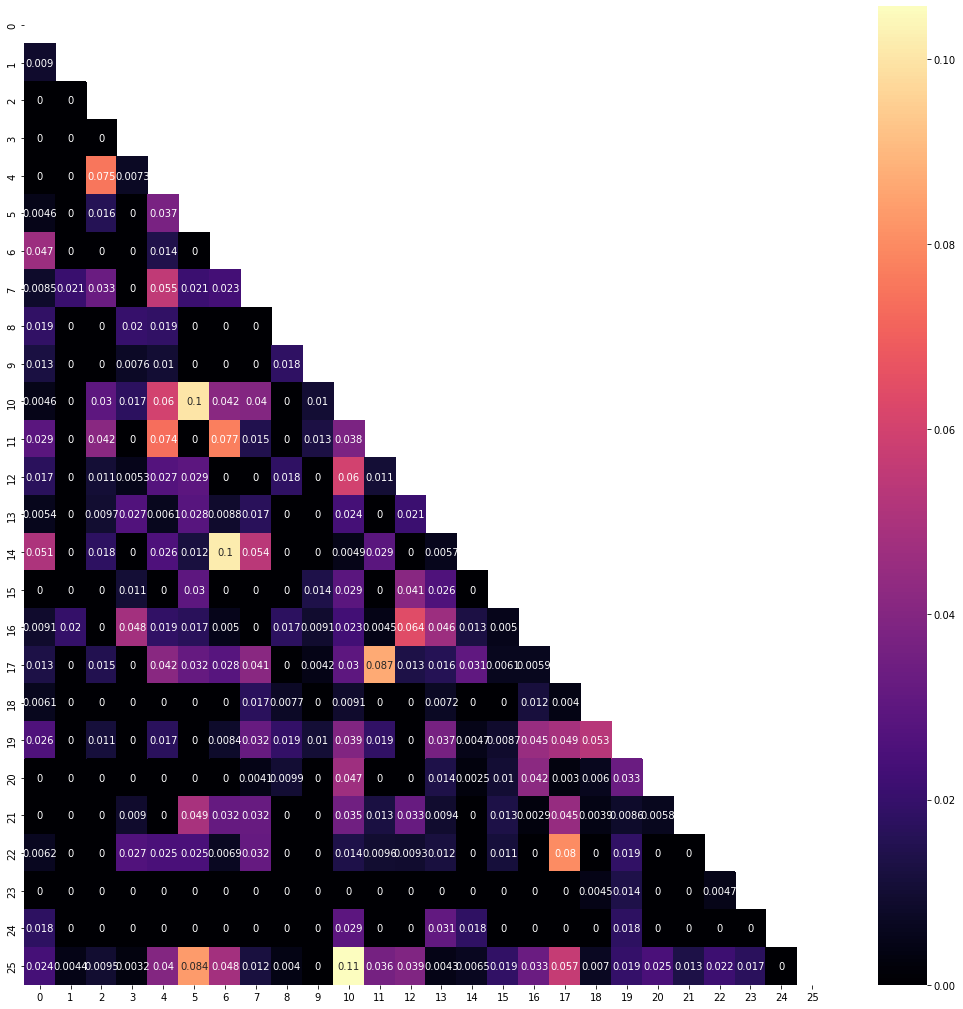

In [59]:
mask = np.zeros_like(pd11)
mask[np.triu_indices_from(mask)] = True
sns.reset_orig()
plt.figure(figsize=(18,18))
ax = sns.heatmap(pd11,cmap="magma",annot=True,mask=mask)

In [60]:
pd10['section']=df['section'].astype('string')
pd10['section_words']=df['section_words'].astype('string')
pd10.head()

,0,1,2,3,4,5,6,7,8,9,...,7543,7544,7545,7546,7547,7548,7549,7550,section,section_words
0,0.000000,0.009037,0.000000,0.00000,0.000000,0.004616,0.046516,0.008528,0.018689,0.012555,...,0.020680,0.000000,0.018383,0.000000,0.023227,0.000000,0.007367,0.0,3,Business
1,0.009037,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.020830,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011162,0.000000,0.000000,0.031200,0.0,0,Politics
2,0.000000,0.000000,0.000000,0.00000,0.075186,0.016002,0.000000,0.033109,0.000000,0.000000,...,0.000000,0.006068,0.000000,0.000000,0.000000,0.000000,0.008028,0.0,3,Business
3,0.000000,0.000000,0.000000,0.00000,0.007350,0.000000,0.000000,0.000000,0.020031,0.007575,...,0.011951,0.029939,0.000000,0.002355,0.003404,0.014187,0.007903,0.0,1,Technology
4,0.000000,0.000000,0.075186,0.00735,0.000000,0.037281,0.014120,0.055347,0.018914,0.010191,...,0.000000,0.000000,0.013360,0.000000,0.000000,0.000000,0.014265,0.0,3,Business


In [61]:
pd11=pd10
i=0
while i<pd11.shape[0]:
    pd11.iloc[i,i]=0
    i+=1
pd11.head()

,0,1,2,3,4,5,6,7,8,9,...,7543,7544,7545,7546,7547,7548,7549,7550,section,section_words
0,0.000000,0.009037,0.000000,0.00000,0.000000,0.004616,0.046516,0.008528,0.018689,0.012555,...,0.020680,0.000000,0.018383,0.000000,0.023227,0.000000,0.007367,0.0,3,Business
1,0.009037,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.020830,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011162,0.000000,0.000000,0.031200,0.0,0,Politics
2,0.000000,0.000000,0.000000,0.00000,0.075186,0.016002,0.000000,0.033109,0.000000,0.000000,...,0.000000,0.006068,0.000000,0.000000,0.000000,0.000000,0.008028,0.0,3,Business
3,0.000000,0.000000,0.000000,0.00000,0.007350,0.000000,0.000000,0.000000,0.020031,0.007575,...,0.011951,0.029939,0.000000,0.002355,0.003404,0.014187,0.007903,0.0,1,Technology
4,0.000000,0.000000,0.075186,0.00735,0.000000,0.037281,0.014120,0.055347,0.018914,0.010191,...,0.000000,0.000000,0.013360,0.000000,0.000000,0.000000,0.014265,0.0,3,Business


In [62]:
palette=sns.color_palette("husl", 4)

In [63]:
network_lut = dict(zip(map(str, df['section_words'].unique()), palette))
network_lut

{'Business': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 'Politics': (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 'Technology': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 'Entertainment': (0.6423044349219739, 0.5497680051256467, 0.9582651433656727)}

In [64]:
network_colors = pd11['section_words'].map(network_lut)

<Figure size 1800x1800 with 0 Axes>

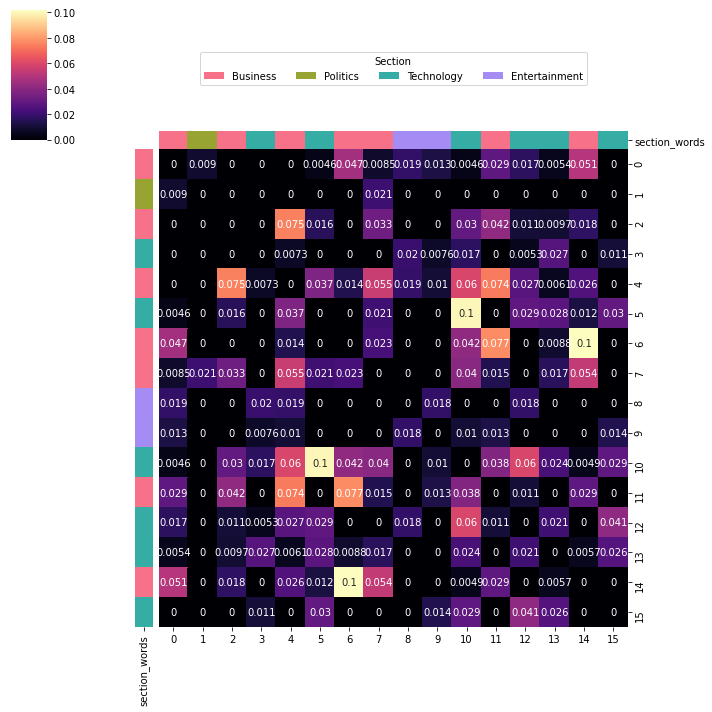

In [65]:
pd12=pd11.loc[0:15,0:15]
mask = np.zeros_like(pd11)
mask[np.triu_indices_from(mask)] = True
sns.reset_orig()
plt.figure(figsize=(25,25))
g = sns.clustermap(pd12,

                  # Turn off the clustering
                  row_cluster=False, col_cluster=False,annot=True,

                  # Add colored class labels
                  row_colors=network_colors, col_colors=network_colors,

                  # Make the plot look better when many rows/cols
                  linewidths=0,cmap='magma')

from matplotlib.pyplot import gcf

for label in pd11['section_words'].unique():
    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label], label=label, linewidth=0)

l1 = g.ax_col_dendrogram.legend(title='Section',loc='center', ncol=5,  bbox_transform=gcf().transFigure)
plt.show()

In [66]:
df.head(26)

,story,section,length,section_words,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized,n_stemm_words,n_lemm_words
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",3,843,Business,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",But the most painful was the huge reversal in fee income unheard of among private sector lenders...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fe...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank t...,82.0,82.0
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",0,129,Politics,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhan...,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,13.0,13.0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",3,386,Business,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 C...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malay...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian r...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysi...,41.0,40.0
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",1,587,Technology,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer ei...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either w...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer eithe...,51.0,51.0
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",3,299,Business,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",In global markets gold prices edged up today as disappointing Chinese factory activity data brou...,global markets gold prices edged today disappointing chinese factory activity data brought back ...,global market gold price edg today disappoint chines factori activ data brought back concern hea...,global market gold price edged today disappointing chinese factory activity data brought back co...,37.0,37.0
5,BEIJING: Chinese tech giant Huawei has announced plans to release a next-generation smartphone b...,1,401,Technology,BEIJING: Chinese tech giant Huawei has announced plans to release a next-generation smartphone b...,BEIJING Chinese tech giant Huawei has announced plans to release a nextgeneration smartphone bas...,beijing chinese tech giant huawei announced plans release nextgeneration smartphone based techno...,beij chines tech giant huawei announc plan releas nextgener smartphon base technolog instead us ...,beijing chinese tech giant huawei announced plan release nextgeneration smartphone based technol...,42.0,40.0
6,Mumbai: India Inc's external commercial borrowings (ECBs) fell by 45% to $2.42

In [84]:
# mporoume na valoume oti en dixnei polla pramata giati....

## Part 3: Algorithms for Classification (Classifying the news/story to a category/section) 

#### We will test the algorithms accuracy for using bank of words or tfidf Vectorizer as well as stemmed or lemmatized text

Pavlos: normalize row instead of columns gia algorithmous p den theloun midenika. (SVC) (random forest gia paradigma p den exoun sxeseis oi apostaseis den mas koftei an exei midenika) \
Pavlos: diadikasia grid search gia dokimi parametrwn algorithmwn (sto lab pavlou gia regression) \
Pavlos: accuracy isws na min dixnei kati (paradigma covid me 1000 atoma, 990 den exoun covid kai 10 exoun). Auto exei na kanei an den exw idio arithmo inputs gia gia kathe section \
Pavlos: K means clustering krivontas to Y value kai an einai ta idia me ta section,tote mporw na xrisimopoiisw tis key words p vgazei o kmeans gia na kanw classification. Akoma 1 dokimi \
isws xreiastei na valoume kai to lenth (number of characters or words) sto classification giati sto section p.x. einai ksekathara mikrotero.

### Clustering with K-means (diadikasia p perigrapsa pio panw)

In [182]:
# Perform k-means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)

# Use k-keans to adjust each story to a section (we don't use the section/category information)
kmeans.fit(tfidf_matrix)
# get cluster assignments; a label (0,1,2 or 3) for each story (new)
labels = kmeans.labels_.tolist()

In [183]:
i=0
for i in range(len(labels)):
    df.loc[i,'kmeans_clust']=labels[i]
    i+=1

In [157]:
df.head()

,story,section,length,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized,n_stemm_words,n_lemm_words,kmeans_clust
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",3,843,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",But the most painful was the huge reversal in fee income unheard of among private sector lenders...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fe...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank t...,82.0,82.0,1.0
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",0,129,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhan...,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,13.0,13.0,3.0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",3,386,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 C...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malay...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian r...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysi...,41.0,40.0,1.0
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",1,587,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer ei...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either w...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer eithe...,51.0,51.0,3.0
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",3,299,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",In global markets gold prices edged up today as disappointing Chinese factory activity data brou...,global markets gold prices edged today disappointing chinese factory activity data brought back ...,global market gold price edg today disappoint chines factori activ data brought back concern hea...,global market gold price edged today disappointing chinese factory activity data brought back co...,37.0,37.0,1.0


In [170]:
i=0
for i in range(len(labels)):
    if df.loc[i,'kmeans_clust']==3:
        df.loc[i,'kmeans_clust']=2
    elif df.loc[i,'kmeans_clust']==2:
        df.loc[i,'kmeans_clust']=0
    elif df.loc[i,'kmeans_clust']==0:
        df.loc[i,'kmeans_clust']=1
    else:
        df.loc[i,'kmeans_clust']=3
    i+=1

In [171]:
c=0
for i in range(len(df)):
    if df['section'][i]==df['kmeans_clust'][i]:
        c=c+1
        

clusteringAguarancy= c/len(df)
print(round(clusteringAguarancy,2))

0.24


In [75]:
df.head()

,story,section,length,story_notags,story_nopunct,story_nostop,story_stemmed,story_lemmatized,n_stemm_words,n_lemm_words,kmeans_clust
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",3,843,"But the most painful was the huge reversal in fee income, unheard of among private sector lender...",But the most painful was the huge reversal in fee income unheard of among private sector lenders...,painful huge reversal fee income unheard among private sector lenders essentially means yes bank...,pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fe...,painful huge reversal fee income unheard among private sector lender essentially mean yes bank t...,82.0,82.0,3.0
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",0,129,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jhark...",How formidable is the opposition alliance among Congress Jharkhand Mukti Morcha JMM and Jharkhan...,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik,formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha ...,13.0,13.0,2.0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",3,386,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0...",Most Asian currencies were trading lower today South Korean won was down 04 China renminbi 023 C...,asian currencies trading lower today south korean 04 china renminbi 023 china offshore 015 malay...,asian currenc trade lower today south korean 04 china renminbi 023 china offshor 015 malaysian r...,asian currency trading lower today south korean 04 china renminbi 023 china offshore 015 malaysi...,41.0,40.0,3.0
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",1,587,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also che...",If you want to answer any question click on ‘Answer’ After clicking on Answer you can also check...,want answer question click ‘ answer ’ clicking answer also check replies users proceed answer ei...,want answer question click ‘ answer ’ click answer also check repli user proceed answer either w...,want answer question click ‘ answer ’ clicking answer also check reply user proceed answer eithe...,51.0,51.0,2.0
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",3,299,"In global markets, gold prices edged up today as disappointing Chinese factory activity data bro...",In global markets gold prices edged up today as disappointing Chinese factory activity data brou...,global markets gold prices edged today disappointing chinese factory activity data brought back ...,global market gold price edg today disappoint chines factori activ data brought back concern hea...,global market gold price edged today disappointing chinese factory activity data brought back co...,37.0,37.0,3.0


In [168]:
df[['section','kmeans_clust']].head(60)

,section,kmeans_clust
0,3,2.0
1,0,0.0
2,3,2.0
3,1,0.0
4,3,2.0
5,1,3.0
6,3,2.0
7,3,2.0
8,2,0.0
9,2,0.0


In [185]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
k = 4
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf_matrix)
#Next, we’ll find a 2-D representation of our 50-dimensional data using t-SNE.

tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
#With our vector embeddings in hand, let’s plot the laws colored according to their k-means cluster assignment.




[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7551 samples in 0.000s...
[t-SNE] Computed neighbors for 7551 samples in 0.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7551
[t-SNE] Computed conditional probabilities for sample 2000 / 7551
[t-SNE] Computed conditional probabilities for sample 3000 / 7551
[t-SNE] Computed conditional probabilities for sample 4000 / 7551
[t-SNE] Computed conditional probabilities for sample 5000 / 7551
[t-SNE] Computed conditional probabilities for sample 6000 / 7551
[t-SNE] Computed conditional probabilities for sample 7000 / 7551
[t-SNE] Computed conditional probabilities for sample 7551 / 7551
[t-SNE] Mean sigma: 0.010511
[t-SNE] Computed conditional probabilities in 0.439s
[t-SNE] Iteration 50: error = 88.3044052, gradient norm = 0.0305510 (50 iterations in 3.185s)
[t-SNE] Iteration 100: error = 74.4026718, gradient norm = 0.0027337 (50 iterations in 3.375s)
[t-SNE] Iteration 150: error = 73.1552887, gradient norm = 

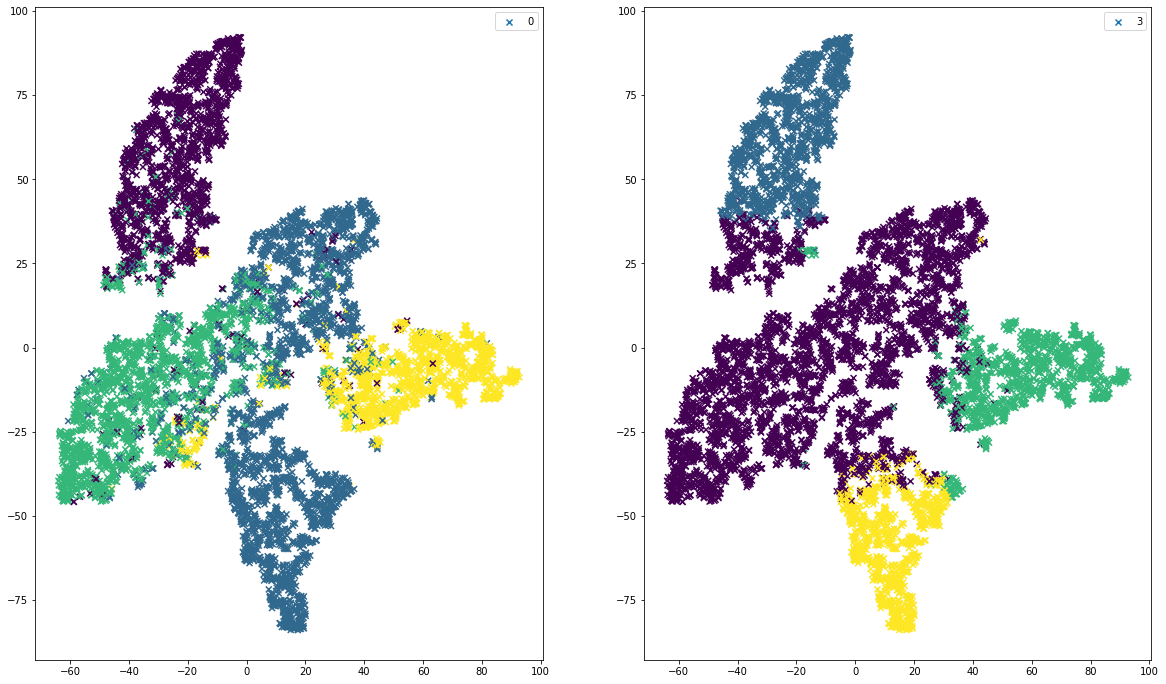

In [186]:
fig = plt.figure(figsize=(20,12))

ax1 = fig.add_subplot(121)
ax1.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = df["section"])

ax2 = fig.add_subplot(122)
ax2.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = df["kmeans_clust"])

ax1.legend(['0','1','2','3'])
ax2.legend(df["section"])

plt.show()

In [98]:
type(tfidf_matrix)

scipy.sparse.csr.csr_matrix

# K-Nearest Neighbors

In [209]:
print(tfidf_matrix[0:2])

  (0, 15446)	0.09388610839620316
  (0, 16878)	0.05875564480559559
  (0, 12824)	0.06594441389087274
  (0, 20555)	0.12907356416861848
  (0, 13663)	0.07328789405163658
  (0, 12468)	0.0646283334424227
  (0, 28778)	0.05975601723833473
  (0, 23189)	0.11485107909129413
  (0, 8125)	0.04960332260134219
  (0, 24141)	0.1057738415953813
  (0, 5571)	0.09163021627588931
  (0, 25261)	0.09594406932851163
  (0, 25576)	0.07458096228080982
  (0, 21466)	0.1458920949533288
  (0, 29000)	0.06458758440548328
  (0, 12168)	0.07073358669860175
  (0, 27460)	0.09678744536915457
  (0, 16561)	0.13126911776988107
  (0, 14035)	0.08335807254956704
  (0, 7887)	0.09437695762246671
  (0, 16687)	0.07760865705518609
  (0, 14657)	0.13582842506316967
  (0, 8356)	0.07716544348171817
  (0, 18920)	0.07399367742332541
  (0, 12603)	0.06555135386679539
  :	:
  (0, 5661)	0.06426517744839372
  (0, 29280)	0.09271950377710948
  (0, 17465)	0.14379516439899706
  (0, 10863)	0.0979837712606213
  (0, 16331)	0.0970784658511373
  (0, 23754)	0

In [88]:
tfidf_matrix_arr=tfidf_matrix.toarray()

In [100]:
np.set_printoptions(threshold=np.inf)
#print(tfidf_matrix_arr[0])

In [213]:
from sklearn.preprocessing import Normalizer,StandardScaler
X=tfidf_matrix_arr.T
X=StandardScaler().fit(X).transform(X)
X=X.T

In [215]:
Y=df['section'].array
Y

<PandasArray>
[3, 0, 3, 1, 3, 1, 3, 3, 2, 2,
 ...
 1, 0, 2, 1, 1, 0, 2, 1, 0, 2]
Length: 7551, dtype: int64

In [99]:
np.set_printoptions(threshold=np.inf)
#X[0]

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6040, 29514) (6040,)
Test set: (1511, 29514) (1511,)


In [218]:
from sklearn.neighbors import KNeighborsClassifier
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 1, 2, 1, 0, 0, 0, 2, 1], dtype=int64)

In [219]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9680463576158941
Test set Accuracy:  0.9576439444076771


In [247]:
K_nearest_neighbors=[]
Train_acc=[]
Test_acc=[]
for k in range(1,31):
   neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
   yhat = neigh.predict(X_test)
   K_nearest_neighbors.append(k)
   print(k)
   Train_acc.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
   print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
   Test_acc.append(metrics.accuracy_score(y_test, yhat))
   print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

1
Train set Accuracy:  1.0
Test set Accuracy:  0.9583057577763071
2
Train set Accuracy:  0.9731788079470198
Test set Accuracy:  0.9305095962938451
3
Train set Accuracy:  0.979635761589404
Test set Accuracy:  0.956982131039047
4
Train set Accuracy:  0.9687086092715231
Test set Accuracy:  0.9516876240900066
5
Train set Accuracy:  0.9711920529801324
Test set Accuracy:  0.9530112508272667
6
Train set Accuracy:  0.9680463576158941
Test set Accuracy:  0.9576439444076771
7
Train set Accuracy:  0.9682119205298013
Test set Accuracy:  0.9583057577763071
8
Train set Accuracy:  0.9644039735099338
Test set Accuracy:  0.9563203176704169
9
Train set Accuracy:  0.9655629139072848
Test set Accuracy:  0.9609530112508272
10
Train set Accuracy:  0.9658940397350994
Test set Accuracy:  0.9576439444076771
11
Train set Accuracy:  0.9637417218543046
Test set Accuracy:  0.9576439444076771
12
Train set Accuracy:  0.96341059602649
Test set Accuracy:  0.9563203176704169
13
Train set Accuracy:  0.9640728476821192
T

In [248]:
pd20=pd.DataFrame(data=[K_nearest_neighbors,Train_acc,Test_acc]).T
pd20.rename(columns={0:'K',1:'Train_acc',2:'Test_acc'},inplace=True)
pd20['Train_acc']=pd20['Train_acc']*100
pd20['Test_acc']=pd20['Test_acc']*100
pd20.head()

,K,Train_acc,Test_acc
0,1.0,100.000000,95.830576
1,2.0,97.317881,93.050960
2,3.0,97.963576,95.698213
3,4.0,96.870861,95.168762
4,5.0,97.119205,95.301125


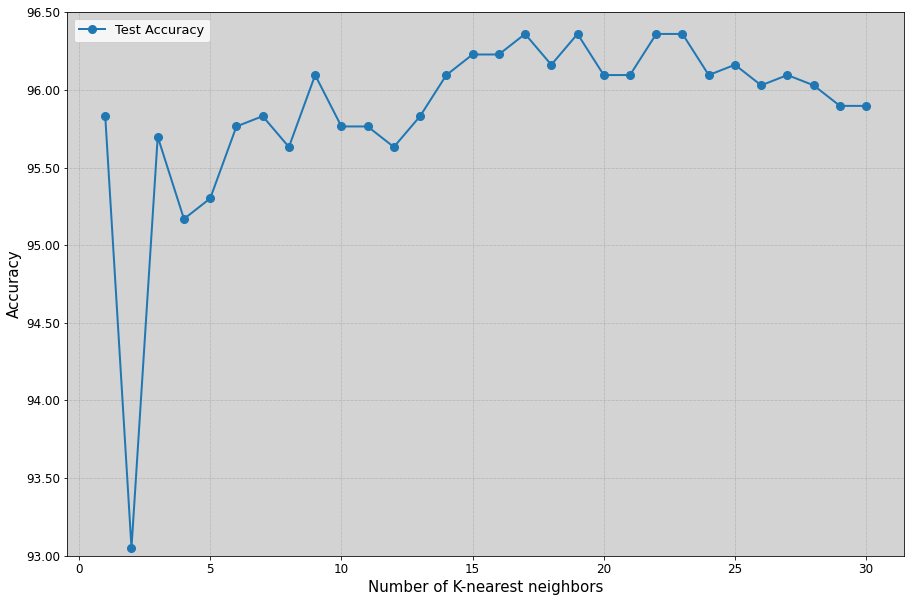

In [251]:
from matplotlib.ticker import FormatStrFormatter
sns.reset_orig()
ax=pd20.plot(kind='line',x='K',y='Test_acc',style='o-',linewidth=2,ms=8,figsize=(15,10))
ax.set_facecolor('lightgrey')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_ylabel('Accuracy',fontsize=15)
ax.set_ylim(93,96.5)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel('Number of K-nearest neighbors',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.legend(['Test Accuracy'],fontsize=13,loc='upper left')

#### den tha kanw grid search gia knn afou to mono p allazei einai to number of neighbors kai to exw dokimasei idi. Tha kanw omos gross validation

In [270]:
# import k-folder
from sklearn.model_selection import cross_val_score

### Pio katw kanw ksana epilogi k me cross validation omos sto training set

In [95]:
# K_nearest_neighbors=[]
# Train_acc=[]
# Test_acc=[]
# for k in range(1,5):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     K_nearest_neighbors.append(k)
#     print(k)
#     Test_acc.append(scores.mean())
#     print(scores)
#     print("Test set Accuracy: ", scores.mean())

1
[0.93650794 0.94708995 0.95414462 0.93109541 0.97526502 0.94699647
 0.9434629  0.9434629  0.95053004 0.94876325]
Test set Accuracy:  0.9477318476140619
2
[0.8994709  0.91887125 0.91534392 0.9204947  0.93992933 0.91519435
 0.92579505 0.9204947  0.91872792 0.91696113]
Test set Accuracy:  0.9191283240164274
3
[0.94179894 0.92945326 0.9382716  0.93992933 0.96466431 0.95759717
 0.94876325 0.9434629  0.94522968 0.95229682]
Test set Accuracy:  0.9461467272421336
4
[0.92945326 0.92768959 0.92768959 0.93992933 0.94699647 0.94876325
 0.94169611 0.94169611 0.93286219 0.93462898]
Test set Accuracy:  0.9371404889661662


In [252]:
# from sklearn.model_selection import GridSearchCV
# knn = KNeighborsClassifier()
# param_grid = dict(n_neighbors=list(range(5, 21)),metric=['minkowski','euclidean'])
# search = GridSearchCV(knn,param_grid, scoring = 'accuracy', cv=10, n_jobs=-1)
# search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [253]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(n_neighbors=9)

 The best score across ALL searched params:
 0.9533112582781456

 The best parameters across ALL searched params:
 {'metric': 'minkowski', 'n_neighbors': 9}


In [135]:
search.cv_results_

{'mean_fit_time': array([4.60517759, 5.13444173, 4.44492767, 4.49464583, 4.18216877,
        4.20719297, 3.72024505, 3.60076463, 3.89298244, 3.53539782,
        3.42082343, 3.57760024, 3.50421128, 3.6217083 , 3.47868998,
        3.47907119, 3.64387777, 3.52054935, 3.43496804, 3.69869123]),
 'std_fit_time': array([1.54034032, 1.61525037, 0.66671462, 0.68340069, 0.37306598,
        0.50669813, 0.54470488, 0.31219839, 0.41712961, 0.2465131 ,
        0.28534922, 0.42431577, 0.3074936 , 0.46434911, 0.35553206,
        0.30960062, 0.35657132, 0.2344438 , 0.34405761, 0.57256204]),
 'mean_score_time': array([23.67309754, 23.11599061, 22.72481606, 23.24355605, 22.832919  ,
        20.51274395, 19.91291699, 20.20513487, 20.92904425, 19.93472693,
        19.32054605, 19.88325372, 19.41108515, 19.5131392 , 19.97386036,
        19.72335124, 19.90306277, 19.93394985, 19.83215897, 18.65561528]),
 'std_score_time': array([3.33997115, 1.14188075, 1.0969892 , 0.72521833, 1.10068203,
        1.79525173, 

### Edw tha dokimasw na mpei kai to length

In [256]:
X2=df['n_stemm_words'].array
X2

<PandasArray>
[ 82.0,  13.0,  41.0,  51.0,  37.0,  42.0,  55.0,  34.0,  22.0,  24.0,
 ...
  78.0,  86.0,  44.0,  40.0,  56.0,  38.0,  14.0,  47.0, 174.0,  35.0]
Length: 7551, dtype: float64

In [257]:
X2.shape

(7551,)

In [258]:
X2[0]

82.0

In [259]:
from sklearn.preprocessing import MinMaxScaler

In [260]:
X2=StandardScaler().fit(df[['n_stemm_words']]).transform(df[['n_stemm_words']])

In [261]:
dfX=pd.DataFrame(X)
dfX2=pd.DataFrame(X2)

In [262]:
dfX['words']=dfX2[0]
dfX.head()

,0,1,2,3,4,5,6,7,8,9,...,29505,29506,29507,29508,29509,29510,29511,29512,29513,words
0,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,...,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,-0.042902,0.366388
1,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,...,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-0.017381,-1.032950
2,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,...,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.033328,-0.465103
3,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,...,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.022808,-0.262301
4,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,...,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.031523,-0.546224


In [263]:
X_new=dfX.to_numpy()

In [264]:
X.shape

(7551, 29514)

In [265]:
X_new.shape

(7551, 29515)

### Apotelesmata me epiprostheto to number of words gia tis parametrous tou kaliterou montelou 

In [266]:
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6040, 29515) (6040,)
Test set: (1511, 29515) (1511,)


In [267]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 1, 2, 1, 0, 0, 0, 2, 1], dtype=int64)

In [268]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.965728476821192
Test set Accuracy:  0.9609530112508272


### Apotelesmata me epiprostheto to number of words gia tis parametrous tou kaliterou montelou me cross validation

In [271]:
k=9
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy: ", scores.mean())

[0.95860927 0.95364238 0.95695364 0.94701987 0.9602649  0.94701987
 0.95033113 0.96688742 0.95529801 0.94039735]
Test set Accuracy:  0.9536423841059601


In [184]:
#to mono p emeine einai na kamw pipeline mallon? Episis na treksoume kai ta alla montela me to extra column tou length sto array

#### Tha dokimasw me bag of words instead

In [273]:
bank_of_words_arr=bank_of_words.toarray()
X=bank_of_words_arr.T
X=StandardScaler().fit(X).transform(X)
X=X.T

In [274]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6040, 29514) (6040,)
Test set: (1511, 29514) (1511,)


In [275]:
k=9
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy: ", scores.mean())

[0.96523179 0.93543046 0.93377483 0.93874172 0.93377483 0.94205298
 0.95860927 0.95198675 0.94536424 0.93874172]
Test set Accuracy:  0.9443708609271523


# Random forest

In [316]:
# #tfidfstem
# from sklearn.model_selection import train_test_split
# # split features and labels (e.g. test = 20%, training = 80% )
# # try both bag of words and tfidf features
# x_train, x_test, y_train, y_test =train_test_split(tfidf_matrix,df['section'].values, test_size=0.20,random_state=10)
# print("Training the random forest...")
# from sklearn.ensemble import RandomForestClassifier
# # Initialize a Random Forest classifier with 100 trees
# forest = RandomForestClassifier(n_estimators = 500,max_depth=110,min_samples_split=5,min_samples_leaf=1)
# # Fit the forest to the training set, using the tfidf as
# # features and the sentiment labels as the response variable
# # This may take a few minutes to run
# forest_model = forest.fit( x_train, y_train )


# y_pred = forest_model.predict( x_test )
# # evaluate accuracy using hamming loss metric
# from sklearn.metrics import hamming_loss

# from sklearn.metrics import confusion_matrix,classification_report
# print("Random forest tfidf accuracy=",1-hamming_loss(y_pred, y_test))
# print(confusion_matrix(y_test,y_pred))
# print('\n')
# print(classification_report(y_test,y_pred))

#CV without grid
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators = 650,max_depth=150,min_samples_split=5,min_samples_leaf=1)
scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy Random Forest tfidf with crossvalidation: ", scores.mean())


[0.95529801 0.95695364 0.93708609 0.95198675 0.94536424 0.93377483
 0.96854305 0.96523179 0.95695364 0.93708609]
Test set Accuracy Random Forest tfidf with crossvalidation:  0.9508278145695364


In [85]:
#tfidfstem
from sklearn.model_selection import train_test_split
# split features and labels (e.g. test = 20%, training = 80% )
# try both bag of words and tfidf features
x_train, x_test, y_train, y_test =train_test_split(tfidf_matrix,df['section'].values, test_size=0.20,random_state=10)
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 950,max_depth=250,min_samples_split=5,min_samples_leaf=1)
# Fit the forest to the training set, using the tfidf as
# features and the sentiment labels as the response variable
# This may take a few minutes to run
forest_model = forest.fit( x_train, y_train )


y_pred = forest_model.predict( x_test )
# evaluate accuracy using hamming loss metric
from sklearn.metrics import hamming_loss

from sklearn.metrics import confusion_matrix,classification_report
print("Random forest tfidf accuracy=",1-hamming_loss(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

#CV without grid
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators = 950,max_depth=250,min_samples_split=5,min_samples_leaf=1)
scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy Random Forest tfidf with crossvalidation: ", scores.mean())

Training the random forest...
Random forest tfidf accuracy= 0.9616148246194574
[[315  10   5   1]
 [  3 553  12   4]
 [  6   4 374   2]
 [  2   4   5 211]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       331
           1       0.97      0.97      0.97       572
           2       0.94      0.97      0.96       386
           3       0.97      0.95      0.96       222

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511

[0.95695364 0.95364238 0.93708609 0.95198675 0.94370861 0.93874172
 0.96688742 0.9602649  0.95860927 0.93046358]
Test set Accuracy Random Forest tfidf with crossvalidation:  0.9498344370860927


In [308]:
#tfidfstem
from sklearn.model_selection import train_test_split
# split features and labels (e.g. test = 20%, training = 80% )
# try both bag of words and tfidf features
x_train, x_test, y_train, y_test =train_test_split(tfidf_matrix,df['section'].values, test_size=0.20,random_state=10)
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)
# Fit the forest to the training set, using the tfidf as
# features and the sentiment labels as the response variable
# This may take a few minutes to run
forest_model = forest.fit( x_train, y_train )


y_pred = forest_model.predict( x_test )
# evaluate accuracy using hamming loss metric
from sklearn.metrics import hamming_loss

from sklearn.metrics import confusion_matrix,classification_report
print("Random forest tfidf accuracy=",1-hamming_loss(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

#CV without grid
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy Random Forest tfidf with crossvalidation: ", scores.mean())




Training the random forest...
Random forest tfidf accuracy= 0.9583057577763071
[[313   8   8   2]
 [  2 552  14   4]
 [  5   6 373   2]
 [  3   4   5 210]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       331
           1       0.97      0.97      0.97       572
           2       0.93      0.97      0.95       386
           3       0.96      0.95      0.95       222

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511

[0.95529801 0.95860927 0.93874172 0.94370861 0.93543046 0.93874172
 0.96688742 0.96357616 0.95529801 0.91721854]
Test set Accuracy Random Forest tfidf with crossvalidation:  0.9473509933774835


In [ ]:
############################################Grid search for Bag of words

n_estimators = [int(x) for x in range(100,500,50)]
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10,110,10)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(1,10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(1,10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier()
search = GridSearchCV(forest,random_grid, scoring = 'accuracy', n_jobs=-1)
search.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

In [312]:
for i in range(50,501,150):
    print(i)

50
200
350
500


In [313]:
############################################Grid search for Bag of words

n_estimators = [int(x) for x in range(50,501,150)]
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10,111,50)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(1,10,4)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(1,10,4)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier()
search = GridSearchCV(forest,random_grid, scoring = 'accuracy',cv=10, n_jobs=-1)
search.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

{'n_estimators': [50, 200, 350, 500], 'max_depth': [10, 60, 110], 'min_samples_split': [1, 5, 9], 'min_samples_leaf': [1, 5, 9]}


c:\users\demetris englezos\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.7910596  0.78857616
 0.79039735 0.7865894  0.78559603 0.78625828 0.78675497 0.7865894
        nan        nan        nan        nan 0.76142384 0.77384106
 0.77417219 0.77268212 0.76390728 0.77003311 0.77301325 0.77152318
        nan        nan        nan        nan 0.76572848 0.76622517
 0.77086093 0.76771523 0.75364238 0.76903974 0.76705298 0.77433775
        nan        nan        nan        nan 0.93774834 0.94486755
 0.94453642 0.94635762 0.94321192 0.94288079 0.94784768 0.94470199
        nan        nan        nan        nan 0.93178808 0.93642384
 0.93543046 0.93592715 0.93129139 0.93642384 0.93509934 0.93642384
        nan        nan        nan        nan 0.92582781 0.93029801
 0.93013245 0.92930464 0.92566225 0.93029801 0.93013245 0.93129139
        nan  

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=110, min_samples_split=5, n_estimators=500)

 The best score across ALL searched params:
 0.9503311258278145

 The best parameters across ALL searched params:
 {'max_depth': 110, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [309]:
#bag of words
from sklearn.model_selection import train_test_split
# split features and labels (e.g. test = 20%, training = 80% )
# try both bag of words and tfidf features
x_train, x_test, y_train, y_test =train_test_split(bank_of_words,df['section'].values, test_size=0.2,random_state=10)
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)
# Fit the forest to the training set, using the tfidf as
# features and the sentiment labels as the response variable
# This may take a few minutes to run
forest_model = forest.fit( x_train, y_train )


y_pred = forest_model.predict( x_test )
# evaluate accuracy using hamming loss metric
from sklearn.metrics import hamming_loss

from sklearn.metrics import confusion_matrix,classification_report
print("Random forest bagofwords  accuracy=",1-hamming_loss(y_pred, y_test))
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

#CV without grid
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(forest, x_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy Random Forest bagofwords with crossvalidation: ", scores.mean())


Training the random forest...
Random forest bagofwords  accuracy= 0.9589675711449371
[[313   8   6   4]
 [  3 553  13   3]
 [  4   6 374   2]
 [  3   5   5 209]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96       331
           1       0.97      0.97      0.97       572
           2       0.94      0.97      0.95       386
           3       0.96      0.94      0.95       222

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511

[0.95860927 0.95364238 0.94205298 0.95695364 0.93377483 0.93046358
 0.96854305 0.95695364 0.96357616 0.92384106]
Test set Accuracy Random Forest bagofwords with crossvalidation:  0.9488410596026491


# MultinomialNB

In [284]:
#tfidf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df["section"],test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Multinomial NB tfidf accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


from sklearn.model_selection import cross_val_score
mb = MultinomialNB()
scores = cross_val_score(mb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy MultinomialNB tfidf with crossvalidation: ", scores.mean())

Multinomial NB tfidf accuracy= 0.9470549305095963
[[318  12   1   0]
 [  2 567   3   0]
 [ 11  30 345   0]
 [  0  21   0 201]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       331
           1       0.90      0.99      0.94       572
           2       0.99      0.89      0.94       386
           3       1.00      0.91      0.95       222

    accuracy                           0.95      1511
   macro avg       0.96      0.94      0.95      1511
weighted avg       0.95      0.95      0.95      1511

[0.95529801 0.92715232 0.94205298 0.91059603 0.93377483 0.92715232
 0.93874172 0.92880795 0.91390728 0.90728477]
Test set Accuracy MultinomialNB tfidf with crossvalidation:  0.9284768211920529


In [285]:
#Bag of words
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_of_words, df["section"],test_size=0.2,random_state=10)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Multinomial NB tfidf accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


from sklearn.model_selection import cross_val_score
mb = MultinomialNB()
scores = cross_val_score(mb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy MultinomialNB tfidf with crossvalidation: ", scores.mean())

Multinomial NB tfidf accuracy= 0.970880211780278
[[323   6   2   0]
 [  3 558   5   6]
 [ 10   8 366   2]
 [  0   2   0 220]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       331
           1       0.97      0.98      0.97       572
           2       0.98      0.95      0.96       386
           3       0.96      0.99      0.98       222

    accuracy                           0.97      1511
   macro avg       0.97      0.97      0.97      1511
weighted avg       0.97      0.97      0.97      1511

[0.97682119 0.96854305 0.97682119 0.97350993 0.97350993 0.96357616
 0.97847682 0.97019868 0.97682119 0.95529801]
Test set Accuracy MultinomialNB tfidf with crossvalidation:  0.9713576158940397


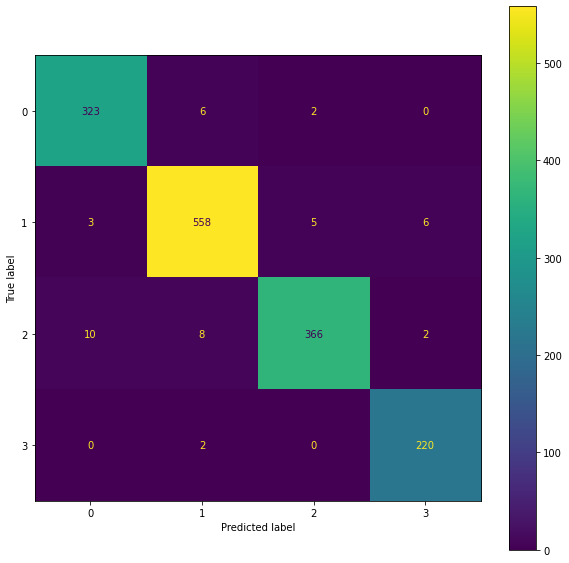

In [296]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(nb, X_test, y_test,ax=ax)
plt.show()

# Multinomial Logistic regression

In [278]:
#tfidf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['section'], test_size=0.2, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



predictions = logreg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Logistic Regression tfidf accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


from sklearn.model_selection import cross_val_score
lg = LogisticRegression()
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy using Logistic Regression tfidf method  with crossvalidation: ", scores.mean())

Logistic Regression tfidf accuracy= 0.971542025148908
[[312   8  10   1]
 [  1 559  10   2]
 [  3   1 382   0]
 [  0   3   4 215]]


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       331
           1       0.98      0.98      0.98       572
           2       0.94      0.99      0.96       386
           3       0.99      0.97      0.98       222

    accuracy                           0.97      1511
   macro avg       0.97      0.97      0.97      1511
weighted avg       0.97      0.97      0.97      1511

[0.97682119 0.9718543  0.96357616 0.96357616 0.9602649  0.95860927
 0.97350993 0.97682119 0.96854305 0.9602649 ]
Test set Accuracy using Logistic Regression tfidf method  with crossvalidation:  0.9673841059602649


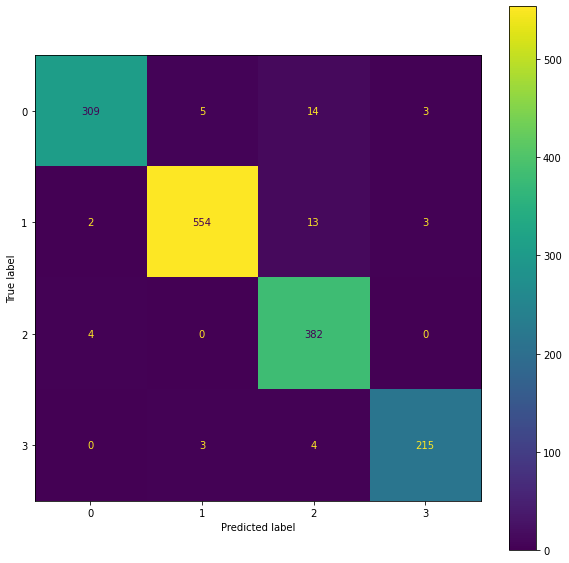

In [297]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(logreg, X_test, y_test,ax=ax)
plt.show()

In [279]:
#Bag of words
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(bank_of_words, df['section'], test_size=0.2, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)





predictions = logreg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Logistic Regression tfidf accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


from sklearn.model_selection import cross_val_score
lg = LogisticRegression()
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy using Logistic Regression tfidf method  with crossvalidation: ", scores.mean())

Logistic Regression tfidf accuracy= 0.9662475181998676
[[309   5  14   3]
 [  2 554  13   3]
 [  4   0 382   0]
 [  0   3   4 215]]


              precision    recall  f1-score   support

           0       0.98      0.93      0.96       331
           1       0.99      0.97      0.98       572
           2       0.92      0.99      0.96       386
           3       0.97      0.97      0.97       222

    accuracy                           0.97      1511
   macro avg       0.97      0.97      0.97      1511
weighted avg       0.97      0.97      0.97      1511

[0.97350993 0.96357616 0.95198675 0.96854305 0.95529801 0.95529801
 0.97350993 0.97350993 0.95695364 0.94039735]
Test set Accuracy using Logistic Regression tfidf method  with crossvalidation:  0.9612582781456954


# GaussianNB

In [304]:
#tfidf
from sklearn.model_selection import train_test_split
nparr=tfidf_matrix.todense()
X_train, X_test, y_train, y_test = train_test_split(nparr, df["section"],test_size=0.2,random_state=10)
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb
gb.fit(X_train,y_train)
predictions = gb.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Gaussian NB tfidf accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



from sklearn.model_selection import cross_val_score
gnb =  GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy using GaussinNB tfidf method  with crossvalidation:", scores.mean())

Gaussian NB tfidf accuracy= 0.9192587690271343
[[312  10   5   4]
 [ 18 543   7   4]
 [ 29  26 330   1]
 [  9   9   0 204]]


              precision    recall  f1-score   support

           0       0.85      0.94      0.89       331
           1       0.92      0.95      0.94       572
           2       0.96      0.85      0.91       386
           3       0.96      0.92      0.94       222

    accuracy                           0.92      1511
   macro avg       0.92      0.92      0.92      1511
weighted avg       0.92      0.92      0.92      1511

[0.93046358 0.93046358 0.92715232 0.90397351 0.91390728 0.91556291
 0.91887417 0.9205298  0.91556291 0.91887417]
Test set Accuracy using GaussinNB tfidf method  with crossvalidation: 0.9195364238410597


In [306]:
#bagofwords
from sklearn.model_selection import train_test_split
nparr1=bank_of_words.todense()
X_train, X_test, y_train, y_test = train_test_split(nparr1, df["section"],test_size=0.2,random_state=10)
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb
gb.fit(X_train,y_train)
predictions = gb.predict(X_test)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
print("Gaussian NB bagofwords accuracy=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


from sklearn.model_selection import cross_val_score
gnb =  GaussianNB()
scores = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print("Test set Accuracy using GaussinNB bagofwords method  with crossvalidation: ", scores.mean())

Gaussian NB bagofwords accuracy= 0.9298477829252151
[[314   5   8   4]
 [ 25 538   5   4]
 [ 22  20 342   2]
 [  3   8   0 211]]


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       331
           1       0.94      0.94      0.94       572
           2       0.96      0.89      0.92       386
           3       0.95      0.95      0.95       222

    accuracy                           0.93      1511
   macro avg       0.93      0.93      0.93      1511
weighted avg       0.93      0.93      0.93      1511

[0.93211921 0.94370861 0.92880795 0.91225166 0.92549669 0.93211921
 0.92715232 0.93874172 0.9205298  0.93211921]
Test set Accuracy using GaussinNB bagofwords method  with crossvalidation:  0.9293046357615895


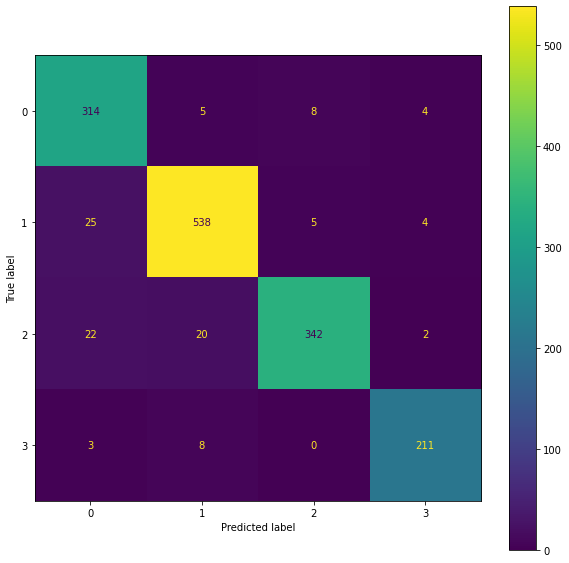

In [307]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gb, X_test, y_test,ax=ax)
plt.show()

In [283]:
df_test=pd.read_excel('Data_Test.xlsx')
df_score=pd.read_excel("Sample_submission.xlsx")
df_test['section']=df_score
df_test.rename(columns={'STORY':'story'},inplace=True)
df_test.head()

,story,section
0,2019 will see gadgets like gaming smartphones and wearable medical devices lifting the user expe...,3
1,It has also unleashed a wave of changes in the MCU that will make sure its future is a lot diffe...,3
2,"It can be confusing to pick the right smartphone for yourself, so we have segregated the top sma...",3
3,The mobile application is integrated with a dashboard to confirm and register the pre-registered...,3
4,"We have rounded up some of the gadgets that showed up in 2018 and left an indelible mark on, con...",3


# SVC

In [92]:
from sklearn.preprocessing import Normalizer,StandardScaler
# X=tfidf_matrix_arr.T
# X=StandardScaler().fit(X).transform(X)
# X=X.T
Y=df['section']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6040, 29514) (6040,)
Test set: (1511, 29514) (1511,)


In [93]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
predictions=clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[320   4   6   1]
 [  1 561   8   2]
 [  3   4 379   0]
 [  0   2   3 217]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       331
           1       0.98      0.98      0.98       572
           2       0.96      0.98      0.97       386
           3       0.99      0.98      0.98       222

    accuracy                           0.98      1511
   macro avg       0.98      0.98      0.98      1511
weighted avg       0.98      0.98      0.98      1511



In [96]:
from sklearn import metrics
print("svm=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))

svm= 0.9774983454665784


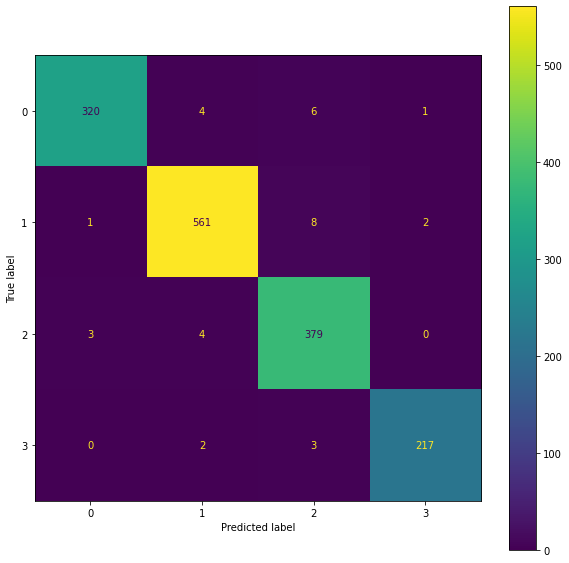

In [98]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,ax=ax)
plt.show()

### SVC with gamma=auto

In [70]:
from sklearn.preprocessing import Normalizer,StandardScaler
tfidf_matrix_arr=tfidf_matrix.toarray()
X=tfidf_matrix_arr
# X=StandardScaler().fit(X).transform(X)
# X=X.T
Y=df['section']
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5663, 29514) (5663,)
Test set: (1888, 29514) (1888,)


In [71]:
from sklearn import svm
clf=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [75]:
predictions=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
from sklearn import metrics
print("svm=",metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None))

[[397   4   6   0]
 [  1 699   9   3]
 [  3   3 484   0]
 [  1   2   3 273]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       407
           1       0.99      0.98      0.98       712
           2       0.96      0.99      0.98       490
           3       0.99      0.98      0.98       279

    accuracy                           0.98      1888
   macro avg       0.98      0.98      0.98      1888
weighted avg       0.98      0.98      0.98      1888

svm= 0.9814618644067796


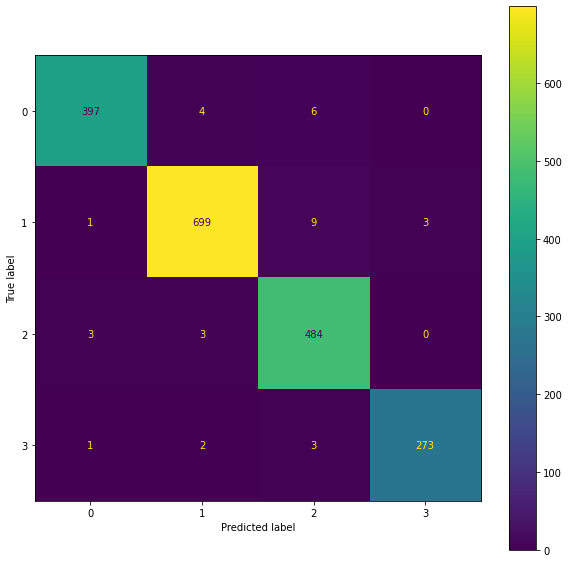

In [77]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,ax=ax)
plt.show()